# MOwNiT 
## Laboratorium
### Iteracyjne metody rozwiązywania równań liniowych

Przykład: Temperatura w stanie stacjonarnym 

Obliczyć rozkład temperatury na kwadratowej płytce w układzie o ustalonych temperaturach na brzegach (brzegi mają różną temperaturę)

Rozkład spełnia równanie Laplace'a

$\frac{\partial^2 	T(x,y)}{\partial x^2}+   \frac {\partial^2 	T(x,y)}{\partial y^2}=0$

Tworzymy rozwiązanie początkowe, siatka nxn, ustawiamy temperaturę na brzegach,  w środku, jako początkową wartość "zgadujemy" 0

In [1]:

function create_initial_solution(n)
    T = zeros(n, n)
    hot_temp=100
    cold_temp=10
    # Ustawienie warunków brzegowych 
    T[1, :] .= hot_temp
    T[n,:] .= hot_temp
    T[:,1].= hot_temp
    T[:,n].= cold_temp
    return T
end
T=create_initial_solution(10)


10×10 Matrix{Float64}:
 100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  10.0
 100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  10.0

Metoda Jakobiego, wzór roboczy $$x_i^{(t+1)}=\frac{1}{a_{ii}}[b_i-\sum_{j=1,j\neq i}^{n} a_{ij}x_j^{(t)}]\  ;\  a_{ii} \neq 0, \forall i \in {1,..,n} $$

Dla równania Laplace'a przyjmuje postać:
$$
		  T^{(t+1)}(x_i,y_j)=
	\frac{T^{(t)}(x_{i},y_{j-1})  + T^{(t)}(x_{i-1}, y_j)
	  +T^{(t)}(x_{i+1},y_{j})
	 +T^{(t)}(x_{i},y_{j+1})}{4} 
	 $$

Uwaga: w kodzie poniżej przyjęto kryterium stopu $|| x_{i+1}-x_{i} || $

In [6]:

function jacobi_laplace(T; maxiter=1000, tol=1e-6)
    n = size(T,1)  
    m = size(T,2)
    
    #tablica, gdzie będziemy zapisywać nową iterację
    T_next=copy(T)

    for iter in 1:maxiter
        delta = 0.0
        # Aktualizacja wewnętrznych punktów siatki
        for j in 2:n-1
            for i in 2:m-1
                # wzór roboczy 
                T_next[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] +  T[i, j-1] + T[i, j+1])
                # największa poprawa w tej iteracji 
                delta = max(delta, abs(T_next[i, j] - T[i, j]))
            end
        end
        # Zamiana macierzy bez kopiowania danych
        T, T_next = T_next, T
        
        # Sprawdzenie warunku zbieżności
        if delta < tol
            println("Zbieżność osiągnięta po $iter iteracjach")
            return T
        end
    end
    println("Osiągnięto maksymalną liczbę iteracji")
    return T
end


T=create_initial_solution(10)
solution = jacobi_laplace(T)

Zbieżność osiągnięta po 255 iteracjach


10×10 Matrix{Float64}:
 100.0  100.0     100.0     100.0     …  100.0     100.0     100.0     10.0
 100.0   98.7662   97.3728   95.63        84.492    75.1577   56.2338  10.0
 100.0   97.6918   95.0952   91.8772      72.9618   59.9048   39.7777  10.0
 100.0   96.9059   93.4389   89.1821      65.8179   51.722    32.972   10.0
 100.0   96.4928   92.5725   87.7859      62.4694   48.1933   30.3884  10.0
 100.0   96.4928   92.5725   87.7859  …   62.4694   48.1933   30.3884  10.0
 100.0   96.9059   93.4389   89.1821      65.8179   51.722    32.972   10.0
 100.0   97.6918   95.0952   91.8772      72.9618   59.9048   39.7777  10.0
 100.0   98.7662   97.3728   95.63        84.492    75.1577   56.2338  10.0
 100.0  100.0     100.0     100.0        100.0     100.0     100.0     10.0

### Zadania

#### Zadanie 1 (4pkt)
Bazując na kodzie metody Jacobiego oraz materiale z wykładu napisz implementacje metod:
* Gaussa-Seidla 1 pkt
* SOR z $\omega_{opt} $ z wykładu czyli
    $\omega_{opt}=\frac{2}{1+\sqrt{1-\rho(M_{GS})}}$
gdzie $\rho(M_{GS})=cos^2(\frac{\pi}{N})$ 1 pkt
* Czebyszewa z wykładu 2pkt

<b>UWAGA:</b>
* W celu porównania metod należy wybrać jeden (ujednolicić) warunek stopu !
     * w tym notebooku pokazany jest przykład kryterium stopu $|| x^{(i+1)}-x^{(i)} ||< \text{tol} $ z  normą maksymalną,
     * na wykładzie w pseudokodzie metody Czebyszewa  jest przykład kryterium $\frac{|| A x^{(i)}-b ||}{||b||}< \text{tol}$ bazującego na  normie euklidesowej (suma kwadratów odległosci).
* W przypadku metody Czebyszewa i przeglądania siadki "odd-even" należy poprawnie policzyć liczbę iteracji (1 iteracja = przejscie "odd" + przejscie "even")
### Zadanie 2 (1 pkt)
Dla ustalonego progu błędu porównaj liczbę iteracji każdej metody potrzebną do osiągnięcia zbieżności dla coraz większych rozmiarów problemu. Wyniki przedstaw na wykresie

### Zadanie 3 (1 pkt)
Dla rozmiaru powyżej 120 pkt porównaj na jednym wykresie wartość maksymalnego błedu w danej iteracji w stosunku do błedu poczatkowego, w zależności od iteracji, dla każdej z metod. Błąd należy oszacować względem <b>otrzymanego ostatecznego rozwiązania </b> np. pod warunkiem osiągnięcia zbieżności - w taki sposób $$\epsilon(\text{iter})=\frac{\sum_{i=\text{iter}}^{\text{maxiter}}\max(\delta)}{\sum_{i=1}^{maxiter} \max(\delta)}$$

### Zadanie 4 (1 pkt + 1 pkt za wizualizację)
Membrana w kształcie kwadratu jest równomiernie obciążona. Membrana znajduje sie w stanie statycznym, a jej brzeg jest sztywno zamocowany i nieodkształcony.

Za pomocą wybranej metody poznanej na tym labolatorium należy obliczyc odkształcenie membrany od poziomu, zakładając
ze spełnia ono równanie Poissona:

$\frac{\delta^{2}h}{\delta x^{2}}+\frac{\delta^{2}h}{\delta y^{2}}=-p/T$

gdzie mamy ustalone parametry:

$p>0$ cisnienie wywierane na membrane.

$T$-napiecie membrany

Poza demonstarcją wartości liczbowych, należy użyć wybranej przez siebie metody wizualizacji wyników. 


In [ ]:
using Plots

function create_initial_solution(n)
    T = zeros(n, n)
    hot_temp = 100
    cold_temp = 10
    T[1, :] .= hot_temp
    T[n, :] .= hot_temp
    T[:, 1] .= hot_temp
    T[:, n] .= cold_temp
    return T
end

function jacobi_laplace(T; maxiter=10_000, tol=1e-6)
    n, m = size(T)
    T_next = copy(T)
    for iter in 1:maxiter
        delta = 0.0
        for j in 2:n-1, i in 2:m-1
            T_next[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
            delta = max(delta, abs(T_next[i, j] - T[i, j]))
        end
        T, T_next = T_next, T
        if delta < tol
            return iter
        end
    end
    return maxiter
end

function gauss_seidel_laplace(T; maxiter=10_000, tol=1e-6)
    n, m = size(T)
    for iter in 1:maxiter
        delta = 0.0
        for j in 2:n-1, i in 2:m-1
            old = T[i, j]
            T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
            delta = max(delta, abs(T[i, j] - old))
        end
        if delta < tol
            return iter
        end
    end
    return maxiter
end

function sor_laplace(T; maxiter=10_000, tol=1e-6)
    n, m = size(T)
    N = n - 2
    ρ = cos(pi / N)^2
    ω = 2 / (1 + sqrt(1 - ρ))
    for iter in 1:maxiter
        delta = 0.0
        for j in 2:n-1, i in 2:m-1
            old = T[i, j]
            T[i, j] = (1 - ω) * T[i, j] + ω * 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
            delta = max(delta, abs(T[i, j] - old))
        end
        if delta < tol
            return iter
        end
    end
    return maxiter
end

function chebyshev_laplace(T; maxiter=10_000, tol=1e-6)
    n, m = size(T)
    N = n - 2  # rozmiar wewnętrzny
    ρ = cos(pi / N)^2
    ω = 1.0
    T_next = copy(T)

    norm_b = 1.0  # ustalamy jako 1, bo nie mamy jawnej macierzy A ani b

    for t in 1:maxiter
        norm = 0.0

        # ODD and EVEN sweeps
        for parity in 0:1
            for j in 2:n-1, i in 2:m-1
                if (i + j) % 2 == parity
                    # Residuum lokalne (dla równania Poissona)
                    res = (T[i-1,j] + T[i+1,j] + T[i,j-1] + T[i,j+1] - 4 * T[i,j])
                    T_next[i,j] = T[i,j] + ω * res / 4  # dzielone przez -ep=q czyli -4
                    norm += res^2
                end
            end
            T, T_next = T_next, T
        end

        norm = sqrt(norm) / norm_b
        if norm < tol
            return t  # każda iteracja zawiera odd + even
        end

        # Aktualizacja ω zgodnie z rekursją Czebyszewa
        if t == 1
            ω = 1.0 / (1.0 - 0.5 * ρ^2)
        else
            ω = 1.0 / (1.0 - 0.25 * ρ^2 * ω)
        end
    end

    return maxiter
end




sizes = [10, 20, 40, 80, 100, 120]
iters_jacobi = Int[]
iters_gs = Int[]
iters_sor = Int[]
iters_cheb = Int[]

for size in sizes
    println("Rozmiar: $size")
    push!(iters_jacobi, jacobi_laplace(create_initial_solution(size)))
    push!(iters_gs, gauss_seidel_laplace(create_initial_solution(size)))
    push!(iters_sor, sor_laplace(create_initial_solution(size)))
    push!(iters_cheb, chebyshev_laplace(create_initial_solution(size)))
end

plot(sizes, iters_jacobi, label="Jacobi", lw=2, marker=:o)
plot!(sizes, iters_gs, label="Gauss-Seidel", lw=2, marker=:o)
plot!(sizes, iters_sor, label="SOR", lw=2, marker=:o)
plot!(sizes, iters_cheb, label="Czebyszew", lw=2, marker=:o)
xlabel!("Rozmiar siatki (N)")
ylabel!("Liczba iteracji")
title!("Porównanie metod iteracyjnych")
savefig("porownanie_metod.png")




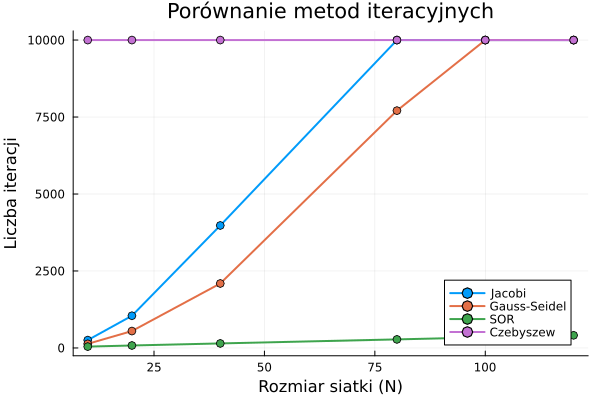

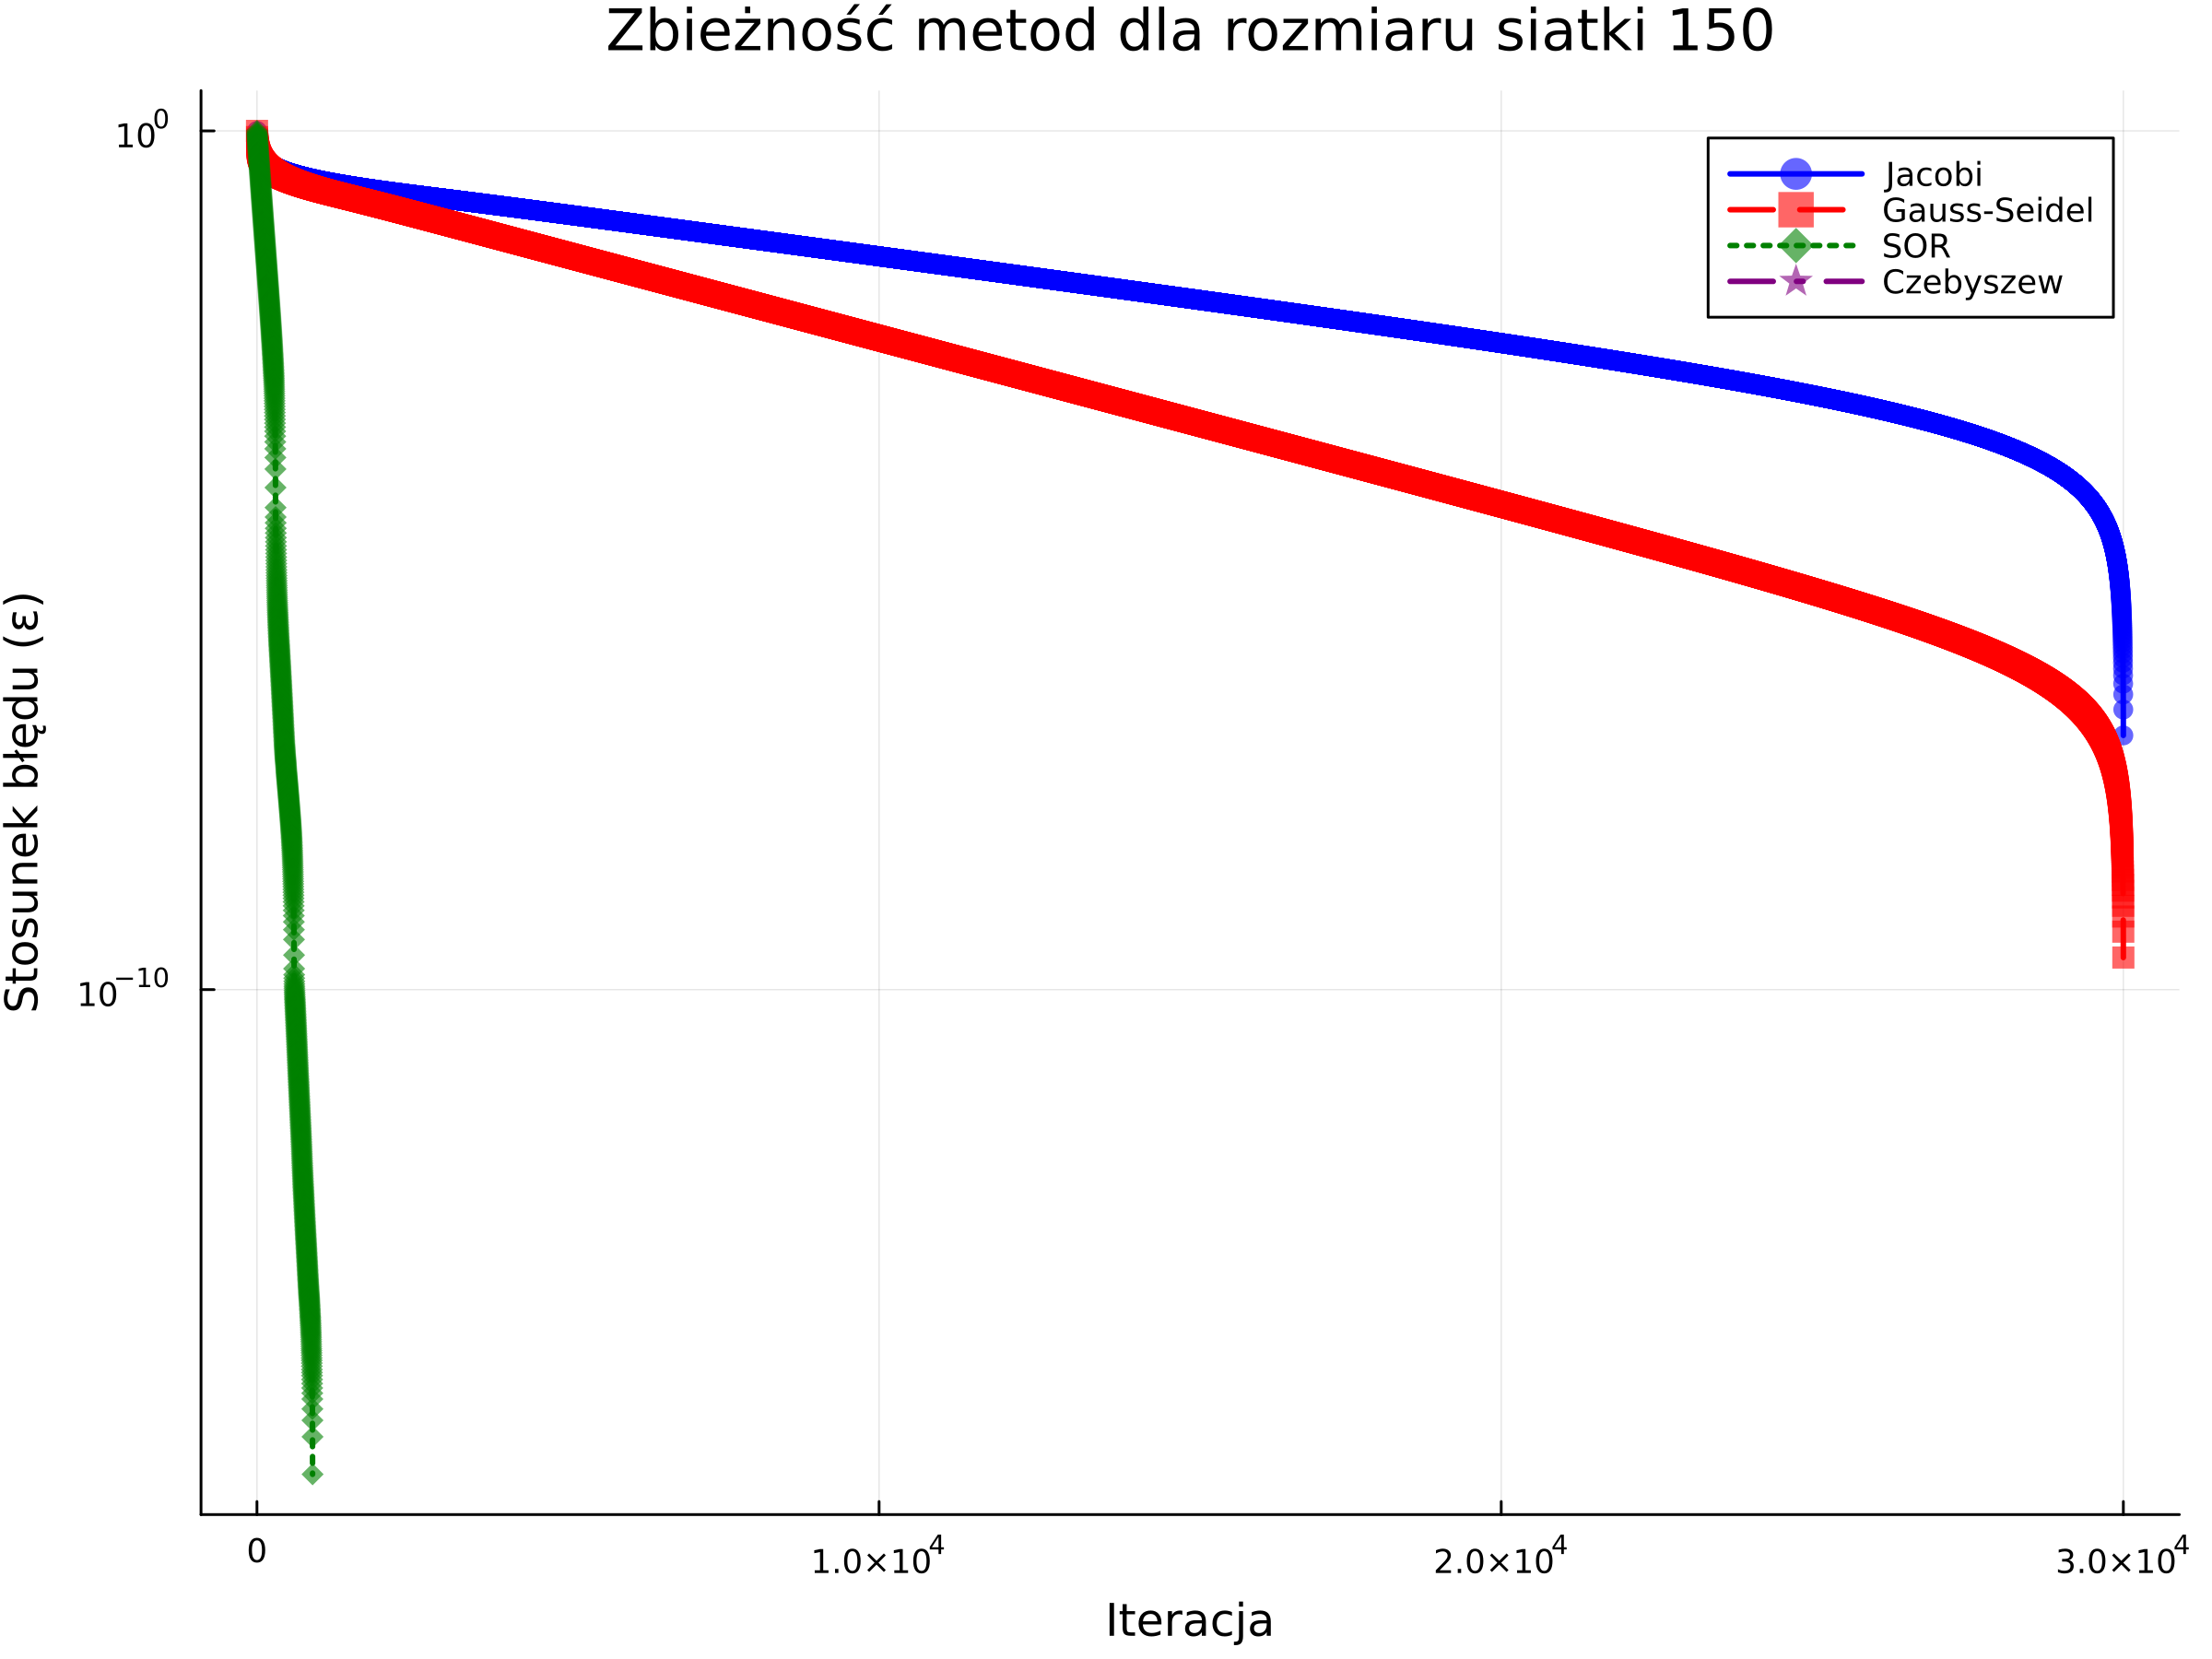

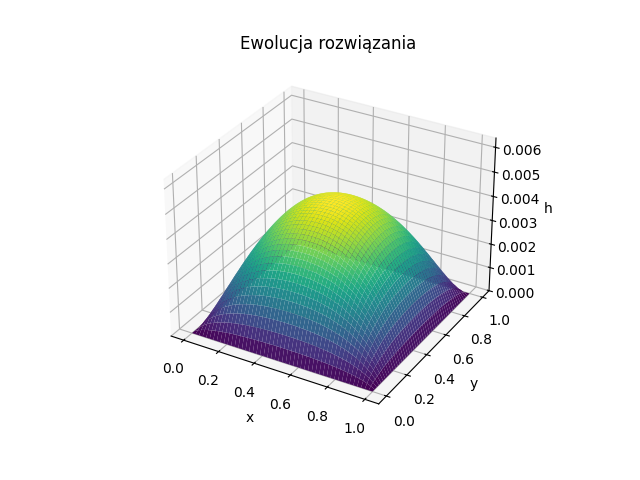